# Description 

Select one or more images, select a crop region and the program will create a TIFF file(s) of your image(s) cropped.

# Imports 

In [5]:
import custom_style
custom_style.style()

In [24]:
IPTS = '16212'

from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import matplotlib.patches as patches
%matplotlib notebook

import numpy as np
import os

from ipywidgets.widgets import interact
from ipywidgets import widgets
from IPython.core.display import display, HTML

import file_handler
import gui_widgets

In [7]:
%gui qt

# Import Images

Select the images your want to crop

In [10]:
list_data_file = gui_widgets.gui_fimage(dir = '/HFIR/CG1DImaging/IPTS-{}/'.format(IPTS))
if list_data_file:
    working_data = []
    for _file in list_data_file:
        _data = np.array(file_handler.load_data(_file))
        working_data.append(_data)
[nbr_files, height, width] = np.shape(working_data)

# Crop Image

## Select Cropping Region 

<IPython.core.display.Javascript object>


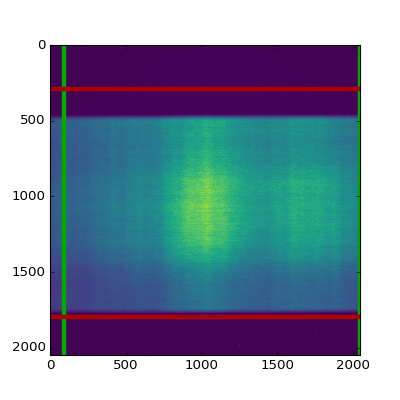

[91, 2047, 287, 1794]

In [16]:
min_value = 0
max_value = 32555


def plot_image_with_crop_region(file_index, x_left, x_right, y_top, y_bottom):

    fig = plt.figure(figsize=(5, 5))
    ax_img = plt.subplot(111)

    ax_img.imshow(working_data[file_index], cmap='viridis')
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)
    
    return [x_left, x_right, y_top, y_bottom]


crop = interact(
    plot_image_with_crop_region,
    file_index = widgets.IntSlider(
    min = 0,
    max = nbr_files-1,
        value=0,
        description='File Index'),
    x_left=widgets.IntSlider(
        min=0, max=width - 1, step=1, value=2060),
    x_right=widgets.IntSlider(
        min=0, max=width - 1, step=1, value=3550),
    y_top=widgets.IntSlider(
        min=0, max=height - 1, step=1, value=287),
    y_bottom=widgets.IntSlider(
        min=0, max=height - 1, step=1, value=1794))

## Cropped Images

In [20]:
[x_left, x_right, y_top, y_bottom] = crop.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

data_cropped = []
for _data in working_data:
    _crop_data = _data[y_top: y_bottom, x_left: x_right]
    data_cropped.append(_crop_data)

Region Selected:
  left : 91
  right: 2047
    top: 287
 bottom: 1794


## Check Cropped Image

<IPython.core.display.Javascript object>


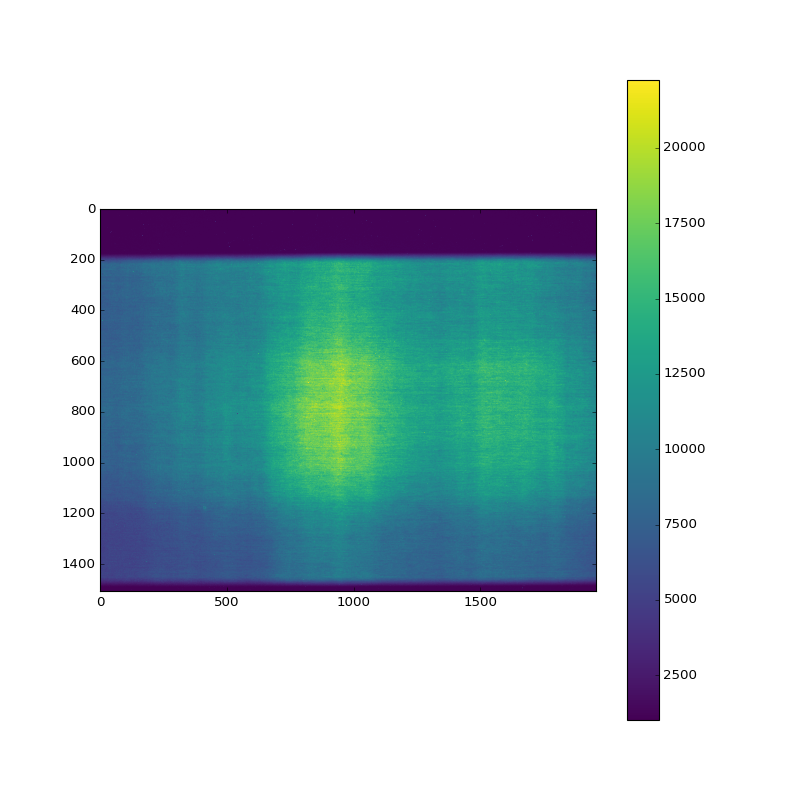

In [21]:
def plot_cropped(file_index):

    #test
    plt.figure(figsize=(10,10))
    plt.imshow(data_cropped[file_index], cmap='viridis')
    plt.colorbar()
    
crop_2 = interact(
    plot_cropped,
    file_index = widgets.IntSlider(
    min = 0,
    max = nbr_files-1,
        value=0,
        description='File Index'))
    


# Export Cropped Image

In [25]:
working_dir = os.path.dirname(data_file)
output_folder_name = gui_widgets.gui_dname(dir=working_dir)

for _index, _file in enumerate(list_data_file):

    [input_image_base_name, ext] = os.path.splitext(os.path.basename(_file))
    output_file_name = os.path.join(output_folder_name, input_image_base_name + '_cropped.tif')
    
    new_image = np.float32(data_cropped[_index])
    file_handler.make_tiff(data = new_image, filename = output_file_name)
    
    display(HTML('<span style="font-size: 20px; color:blue">File created: ' + output_file_name + '</span>'))